0. Описать задачу словами.

Задача состоит в том , что бы по определенному набору параметров ( такому как : город, этаж, год постройки, площадь ...) предсказать цену на квартиру, в нашем случае в польше, те поставлена задача восстановления регрессии.

1. Читаем данные.

In [97]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df = pd.read_csv('/content/apartments_pl_2023_08.csv')



2. Визуализированние данных.

In [2]:
df.shape

(18905, 28)

In [4]:
df

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18900,ae88d7ea0a7a5fa0e9d287cfd78e5676,bydgoszcz,blockOfFlats,84.00,3.0,NaN,4.0,2000.0,53.112927,17.975630,...,0.164,cooperative,brick,NaN,yes,yes,no,no,yes,789000
18901,6a4b30b5fcdee00bfe5bcc0da82df9b1,bydgoszcz,blockOfFlats,94.30,4.0,NaN,2.0,1998.0,53.115921,17.956396,...,0.428,condominium,NaN,NaN,no,yes,no,no,yes,699000
18902,1e7f4f1fdfea31eb84e071d697839632,bydgoszcz,NaN,50.12,2.0,1.0,1.0,NaN,53.126000,18.007900,...,0.205,condominium,brick,NaN,yes,no,no,no,no,360000
18903,d971c4ed3aab9919bf203e96019a678e,bydgoszcz,tenement,100.00,4.0,3.0,4.0,1910.0,53.126000,18.007900,...,0.205,condominium,brick,premium,yes,yes,no,no,yes,590000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18905 entries, 0 to 18904
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18905 non-null  object 
 1   city                  18905 non-null  object 
 2   type                  14866 non-null  object 
 3   squareMeters          18905 non-null  float64
 4   rooms                 18905 non-null  float64
 5   floor                 15467 non-null  float64
 6   floorCount            18643 non-null  float64
 7   buildYear             15634 non-null  float64
 8   latitude              18905 non-null  float64
 9   longitude             18905 non-null  float64
 10  centreDistance        18905 non-null  float64
 11  poiCount              18905 non-null  float64
 12  schoolDistance        18891 non-null  float64
 13  clinicDistance        18817 non-null  float64
 14  postOfficeDistance    18880 non-null  float64
 15  kindergartenDistanc

city,type, ownership, buildingMaterial, condition - категориальные признаки, hasParkingSpace, hasBalcony, hasElevator, hasSecurity, hasStorageRoom - бинарные признаки, остальные признаки , включая итерисующий нас price - количественные.


In [6]:
df.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,18905.000000,18905.000000,15467.000000,18643.000000,15634.000000,18905.000000,18905.000000,18905.000000,18905.000000,18891.000000,18817.000000,18880.000000,18892.000000,18847.000000,18340.000000,18878.000000,1.890500e+04
mean,58.509976,2.676752,3.339820,5.279783,1984.551043,52.020411,19.516394,4.398444,20.099656,0.414897,1.002196,0.518748,0.371033,0.356646,1.460047,0.364134,6.925592e+05
std,21.060168,0.903619,2.549141,3.333666,33.767929,1.353998,1.769053,2.857387,23.513874,0.472782,0.913721,0.506783,0.452338,0.475884,1.102847,0.469334,3.443890e+05
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.979110,14.447127,0.020000,0.000000,0.004000,0.005000,0.001000,0.004000,0.001000,0.006000,0.003000,1.500000e+05
25%,44.200000,2.000000,2.000000,3.000000,1967.000000,51.109100,18.536220,2.070000,7.000000,0.175000,0.367000,0.237000,0.158000,0.118500,0.592000,0.145000,4.588000e+05
50%,54.400000,3.000000,3.000000,4.000000,1990.000000,52.193604,19.908944,4.010000,13.000000,0.288000,0.700000,0.387000,0.264000,0.235000,1.140000,0.239000,6.200000e+05
75%,68.200000,3.000000,4.000000,6.000000,2014.000000,52.412561,20.992010,6.180000,23.000000,0.466500,1.286000,0.621000,0.415000,0.417000,2.107000,0.405000,8.300000e+05
max,150.000000,6.000000,29.000000,29.000000,2023.000000,54.583210,23.207128,16.940000,208.000000,4.818000,4.996000,4.967000,4.960000,4.985000,4.998000,4.992000,2.500000e+06


mean - средние параметры квартиры и ее цены в польше

In [208]:
df['city'] = df['city'].astype('category')
df['type'] = df['type'].astype('category')
df['ownership'] = df['ownership'].astype('category')
df['buildingMaterial'] = df['buildingMaterial'].astype('category')


In [209]:
df.describe(include=['category'])

,city,type,ownership,buildingMaterial
count,18905,18905,18905,18905
unique,15,3,2,2
top,warszawa,blockOfFlats,condominium,brick
freq,5471,13128,16886,16191


In [9]:
df.isnull().sum()

,0
id,0
city,0
type,4039
squareMeters,0
rooms,0
floor,3438
floorCount,262
buildYear,3271
latitude,0
longitude,0


Присутствуют пропущенные значения это надо обработать


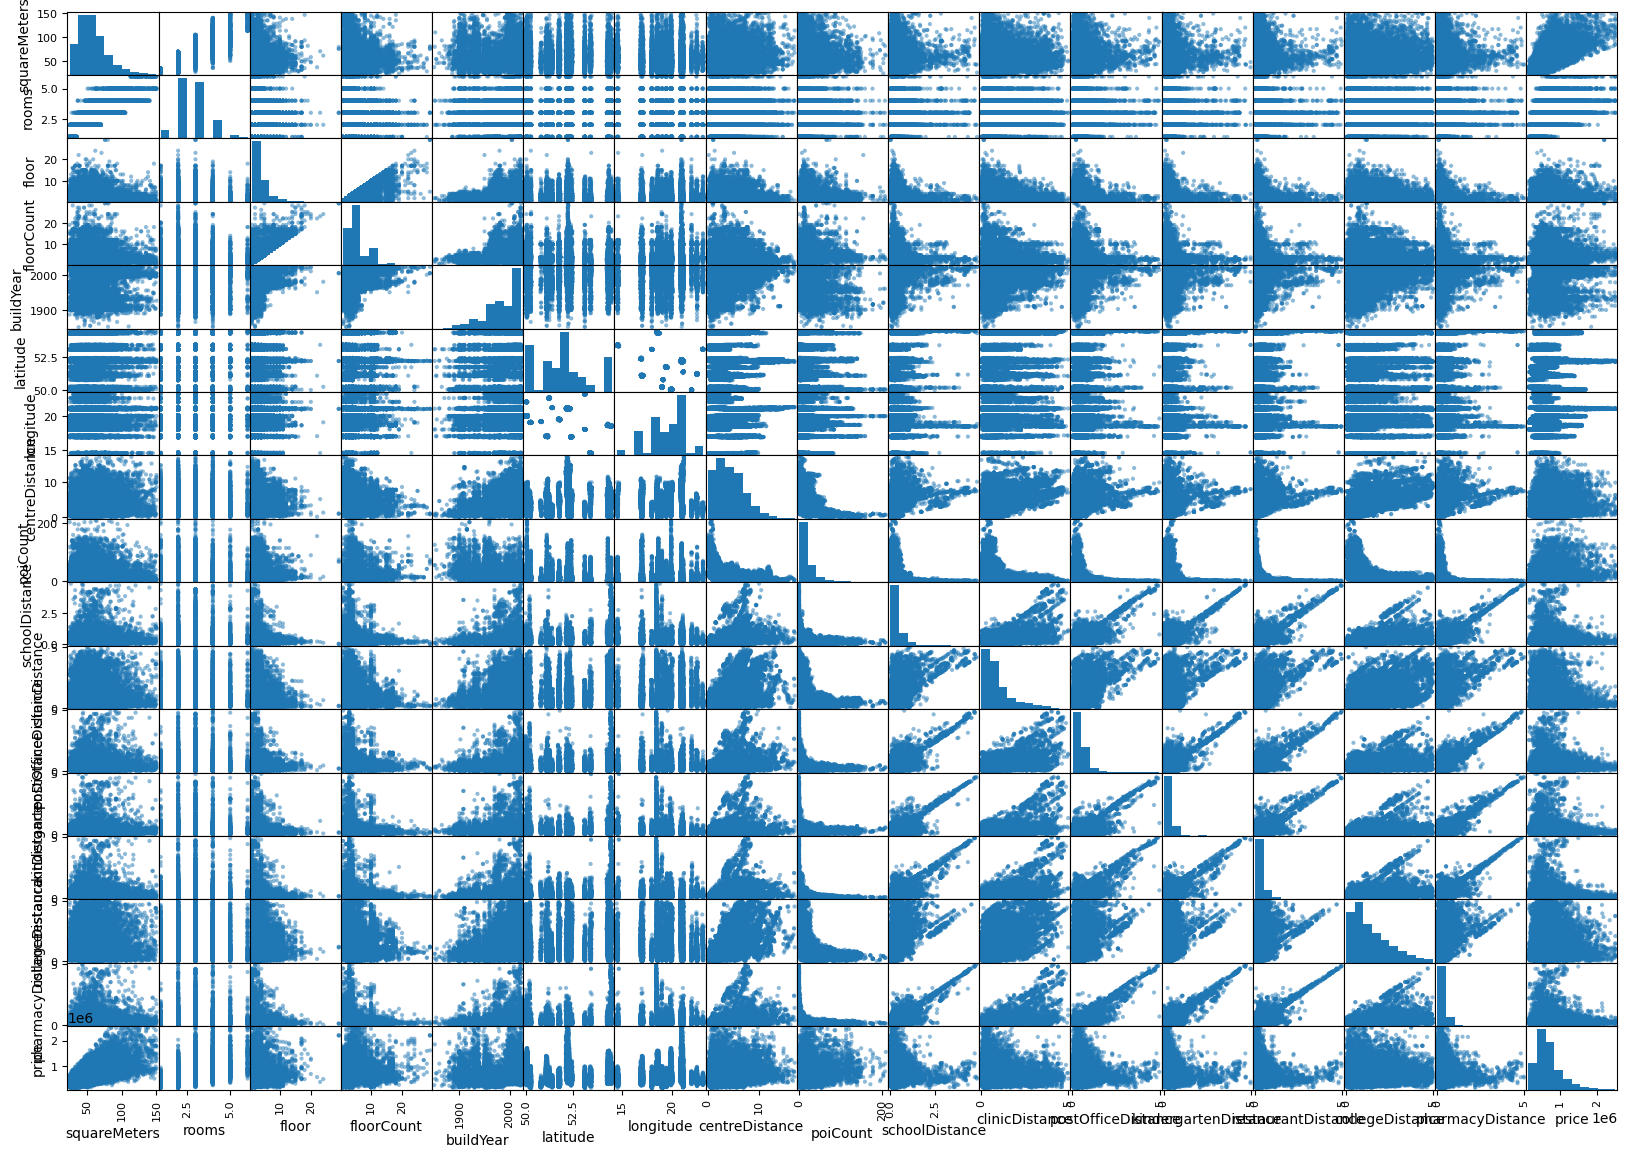

In [10]:
pd.plotting.scatter_matrix(df, figsize = (20, 14))
pass

Видно, что сильных отклонений, те выбросов не наблюдается. Это дает надежду, что данные в датасет вводились корректно

In [23]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
squareMeters,1.000000,0.824637,-0.077543,-0.133833,0.005459,0.041261,-0.016493,0.086320,0.009516,0.073832,0.019900,0.056691,0.063913,0.030691,0.057064,0.058994,0.637771
rooms,0.824637,1.000000,-0.045273,-0.081555,0.019420,0.036177,0.002073,0.081729,-0.023385,0.075782,0.047844,0.061424,0.062183,0.054446,0.071375,0.065842,0.492538
floor,-0.077543,-0.045273,1.000000,0.650412,0.055955,0.003680,0.066752,-0.025200,0.034673,-0.101295,-0.119035,-0.081353,-0.088916,-0.083059,-0.053149,-0.098492,0.007737
floorCount,-0.133833,-0.081555,0.650412,1.000000,0.113463,-0.001473,0.108958,-0.043953,0.045529,-0.136548,-0.180236,-0.115408,-0.128944,-0.120447,-0.073323,-0.135918,0.030736
buildYear,0.005459,0.019420,0.055955,0.113463,1.000000,-0.015146,0.099675,0.336364,-0.345798,0.237136,0.234089,0.218550,0.105233,0.151893,0.335443,0.183757,0.121395
latitude,0.041261,0.036177,0.003680,-0.001473,-0.015146,1.000000,-0.232207,0.092605,-0.059275,0.183150,0.136500,0.129489,0.204656,0.177667,0.119211,0.169089,0.025767
longitude,-0.016493,0.002073,0.066752,0.108958,0.099675,-0.232207,1.000000,0.182382,0.026885,-0.102423,-0.062820,-0.043475,-0.141523,-0.109151,-0.009548,-0.067552,0.200442
centreDistance,0.086320,0.081729,-0.025200,-0.043953,0.336364,0.092605,0.182382,1.000000,-0.458047,0.284216,0.434630,0.268955,0.137009,0.222076,0.547815,0.256674,0.103575
poiCount,0.009516,-0.023385,0.034673,0.045529,-0.345798,-0.059275,0.026885,-0.458047,1.000000,-0.306113,-0.374053,-0.321447,-0.209038,-0.343821,-0.440212,-0.302079,0.180165
schoolDistance,0.073832,0.075782,-0.101295,-0.136548,0.237136,0.183150,-0.102423,0.284216,-0.306113,1.000000,0.534418,0.758232,0.803013,0.776004,0.422992,0.816086,0.009121


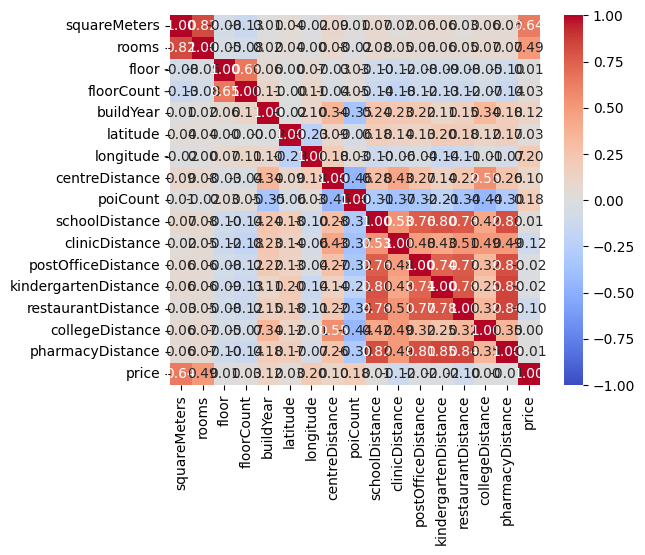

In [24]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

In [123]:
rows_to_drop = df[
    (df['price'] < df['price'].quantile(0.005)) | (df['price'] > df['price'].quantile(0.995)) |
    (df['squareMeters']  < df['squareMeters' ].quantile(0.005)) | (df['squareMeters']  > df['squareMeters' ].quantile(0.995))].index
data = df.drop(rows_to_drop)
data.shape

(18540, 28)

In [127]:
data = data.drop(columns=['id'])

In [210]:
data = data.drop(columns=['condition'])

In [129]:
data.shape

(18540, 27)

In [250]:
x = data.drop(['price'], axis=1)
y = data['price']

In [212]:
x

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
0,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,...,1.652,1.140,0.413,condominium,concreteSlab,yes,yes,yes,no,yes
1,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,1990.0,53.442692,14.559690,2.15,...,0.348,1.404,0.205,cooperative,concreteSlab,no,yes,yes,no,yes
2,szczecin,tenement,73.02,3.0,2.0,3.0,1990.0,53.452222,14.553333,3.24,...,0.300,1.857,0.280,condominium,brick,no,no,no,no,no
3,szczecin,tenement,87.60,3.0,2.0,3.0,1990.0,53.435100,14.532900,2.27,...,0.101,0.310,0.087,condominium,brick,yes,yes,no,no,yes
4,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,1990.0,53.410278,14.503611,4.07,...,0.501,2.138,0.514,condominium,brick,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18900,bydgoszcz,blockOfFlats,84.00,3.0,3.0,4.0,2000.0,53.112927,17.975630,1.96,...,0.665,0.985,0.164,cooperative,brick,yes,yes,no,no,yes
18901,bydgoszcz,blockOfFlats,94.30,4.0,3.0,2.0,1998.0,53.115921,17.956396,3.04,...,0.088,0.759,0.428,condominium,brick,no,yes,no,no,yes
18902,bydgoszcz,blockOfFlats,50.12,2.0,1.0,1.0,1990.0,53.126000,18.007900,0.65,...,0.058,0.622,0.205,condominium,brick,yes,no,no,no,no
18903,bydgoszcz,tenement,100.00,4.0,3.0,4.0,1910.0,53.126000,18.007900,0.65,...,0.058,0.622,0.205,condominium,brick,yes,yes,no,no,yes


In [213]:
y

,price
0,415000.0
1,395995.0
2,565000.0
3,640000.0
4,759000.0
...,...
18900,789000.0
18901,699000.0
18902,360000.0
18903,590000.0


6. Разбиваем на тестовую и обучающую выборки

In [307]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

N_train, d = x_train.shape
N_test,  d = x_test.shape

N_train, N_test, d

(12978, 5562, 25)

3. Обрабатываем пропущенные значения

In [308]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(x_train[['floor', 'rooms', 'floorCount', 'pharmacyDistance','collegeDistance','squareMeters','buildYear','latitude','longitude','centreDistance','poiCount','clinicDistance','postOfficeDistance','schoolDistance','restaurantDistance','kindergartenDistance','schoolDistance']])

SimpleImputer(strategy='median')

In [309]:
x_train[['floor', 'rooms', 'floorCount', 'pharmacyDistance','collegeDistance','squareMeters','buildYear','latitude','longitude','centreDistance','poiCount','clinicDistance','postOfficeDistance','schoolDistance','restaurantDistance','kindergartenDistance','schoolDistance']] = imp_num.transform(x_train[['floor', 'rooms', 'floorCount', 'pharmacyDistance','collegeDistance','squareMeters','buildYear','latitude','longitude','centreDistance','poiCount','clinicDistance','postOfficeDistance','schoolDistance','restaurantDistance','kindergartenDistance','schoolDistance']])

In [310]:
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(x_train[['city', 'type','ownership','buildingMaterial','hasElevator','hasParkingSpace','hasBalcony','hasSecurity','hasStorageRoom']])

SimpleImputer(strategy='most_frequent')

In [311]:
x_train[['city', 'type','ownership','buildingMaterial','hasElevator','hasParkingSpace','hasBalcony','hasSecurity','hasStorageRoom']] = imp_cat.transform(x_train[['city', 'type','ownership','buildingMaterial','hasElevator','hasParkingSpace','hasBalcony','hasSecurity','hasStorageRoom']])

4. Обрабатываем категориальные признаки

In [312]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(x_train[['city', 'type','ownership','buildingMaterial','hasElevator','hasParkingSpace','hasBalcony','hasSecurity','hasStorageRoom']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [313]:
dummies = pd.DataFrame(enc.transform(x_train[['city', 'type','ownership','buildingMaterial','hasElevator','hasParkingSpace','hasBalcony','hasSecurity','hasStorageRoom']]),
                       columns=enc.get_feature_names_out(), index=x_train.index)
dummies.head()

,city_bialystok,city_bydgoszcz,city_czestochowa,city_gdansk,city_gdynia,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,...,type_apartmentBuilding,type_blockOfFlats,type_tenement,ownership_cooperative,buildingMaterial_concreteSlab,hasElevator_yes,hasParkingSpace_yes,hasBalcony_yes,hasSecurity_yes,hasStorageRoom_yes
1207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4242,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
6966,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5915,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
x_train = pd.concat((x_train,dummies),axis = 1).drop(['city', 'type','ownership','buildingMaterial','hasElevator','hasParkingSpace','hasBalcony','hasSecurity','hasStorageRoom'],axis= 1)
x_train

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,...,type_apartmentBuilding,type_blockOfFlats,type_tenement,ownership_cooperative,buildingMaterial_concreteSlab,hasElevator_yes,hasParkingSpace_yes,hasBalcony_yes,hasSecurity_yes,hasStorageRoom_yes
1207,116.80,5.0,4.0,5.0,1994.0,54.562360,18.491290,5.55,0.0,3.073,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4242,40.98,2.0,6.0,6.0,2012.0,50.075757,19.941815,2.29,5.0,0.657,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
6966,56.60,2.0,3.0,3.0,1932.0,54.388432,18.581784,6.40,11.0,0.185,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5170,89.60,4.0,3.0,4.0,1987.0,53.119228,23.099323,3.44,12.0,0.202,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5915,30.00,1.0,3.0,3.0,1900.0,54.370610,18.618590,3.31,5.0,0.542,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11404,74.30,4.0,3.0,14.0,1978.0,50.283040,18.973420,4.21,16.0,0.295,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
12096,58.20,3.0,3.0,3.0,2004.0,51.231300,22.519300,3.83,19.0,0.369,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5437,48.00,2.0,3.0,2.0,1990.0,54.332100,18.587100,4.77,7.0,0.650,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
866,51.26,2.0,1.0,2.0,1952.0,54.541420,18.545440,2.30,0.0,2.073,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


5. Проводим нормолизацию

In [315]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns, index=x_train.index)

x_train.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,...,type_apartmentBuilding,type_blockOfFlats,type_tenement,ownership_cooperative,buildingMaterial_concreteSlab,hasElevator_yes,hasParkingSpace_yes,hasBalcony_yes,hasSecurity_yes,hasStorageRoom_yes
count,1.297800e+04,1.297800e+04,1.297800e+04,1.297800e+04,1.297800e+04,1.297800e+04,1.297800e+04,1.297800e+04,1.297800e+04,1.297800e+04,...,1.297800e+04,1.297800e+04,1.297800e+04,1.297800e+04,1.297800e+04,1.297800e+04,1.297800e+04,1.297800e+04,1.297800e+04,1.297800e+04
mean,-2.693690e-16,-1.552156e-16,-3.175488e-17,2.737489e-19,1.871348e-15,-9.690712e-17,-2.365191e-16,5.693978e-17,3.284987e-17,-5.858227e-17,...,8.294593e-17,-1.127846e-16,-3.613486e-17,-5.693978e-17,2.408991e-17,1.346845e-16,1.073096e-16,-4.927481e-17,-1.943617e-17,2.408991e-17
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,...,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.646889e+00,-1.915648e+00,-9.830260e-01,-1.284364e+00,-4.369716e+00,-1.503261e+00,-2.873827e+00,-1.538923e+00,-8.596684e-01,-8.765692e-01,...,-4.224044e-01,-1.527918e+00,-4.175804e-01,-3.425613e-01,-4.110700e-01,-9.069161e-01,-5.869008e-01,-1.166034e+00,-3.335045e-01,-9.328978e-01
25%,-6.780679e-01,-7.684865e-01,-5.518183e-01,-6.840982e-01,-5.040250e-01,-6.725191e-01,-5.592604e-01,-8.133374e-01,-5.591122e-01,-5.111834e-01,...,-4.224044e-01,-1.527918e+00,-4.175804e-01,-3.425613e-01,-4.110700e-01,-9.069161e-01,-5.869008e-01,-1.166034e+00,-3.335045e-01,-9.328978e-01
50%,-1.926460e-01,3.786745e-01,-1.206106e-01,-3.839655e-01,1.456710e-01,1.238147e-01,2.177530e-01,-1.368248e-01,-3.014925e-01,-2.690091e-01,...,-4.224044e-01,6.544855e-01,-4.175804e-01,-3.425613e-01,-4.110700e-01,-9.069161e-01,-5.869008e-01,8.576076e-01,-3.335045e-01,-9.328978e-01
75%,5.000915e-01,3.786745e-01,3.105971e-01,2.163000e-01,7.953670e-01,2.848962e-01,8.279913e-01,6.203085e-01,1.708101e-01,1.091227e-01,...,-4.224044e-01,6.544855e-01,-4.175804e-01,-3.425613e-01,-4.110700e-01,1.102638e+00,1.703866e+00,8.576076e-01,-3.335045e-01,1.071929e+00
max,4.071482e+00,3.820158e+00,8.934751e+00,7.119353e+00,1.217669e+00,1.879688e+00,2.080036e+00,4.381438e+00,8.071146e+00,9.305373e+00,...,2.367399e+00,6.544855e-01,2.394749e+00,2.919185e+00,2.432676e+00,1.102638e+00,1.703866e+00,8.576076e-01,2.998460e+00,1.071929e+00


In [316]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_train_predict = model.predict(x_train)

In [317]:
model.coef_

array([ 1.91238622e+05, -6.30473495e+03, -1.03626579e+03, -1.61070235e+03,
        2.77143169e+04, -7.09768635e+05, -5.33686755e+04, -4.76723186e+04,
        2.88100119e+04,  5.44913480e+02, -1.29788950e+04,  6.04390762e+03,
        5.35945617e+03, -1.41371228e+04, -7.87997583e+03,  7.81808190e+03,
        5.70723918e+04,  5.46676344e+04, -8.43271630e+04,  3.87140361e+05,
        2.62711146e+05, -1.83479573e+05, -3.45307163e+05, -9.43379655e+04,
       -9.17703032e+04, -2.30869094e+03, -7.53027546e+04, -1.14425934e+05,
        6.42707155e+04,  1.65680591e+05, -1.67719786e+05,  2.31659267e+04,
       -1.71488274e+04, -1.25432953e+03, -8.05846044e+03, -1.13975535e+04,
        2.20288027e+04,  6.99324115e+03,  8.31604988e+03,  5.38405138e+03,
       -1.01822332e+04])

In [318]:
model.intercept_

687428.1641239019

In [319]:
y_train

,price
1207,739000.0
4242,850000.0
6966,499000.0
5170,460000.0
5915,400000.0
...,...
11404,389900.0
12096,509000.0
5437,425000.0
866,325000.0


In [320]:
y_train_predict

array([1089202.79755178,  760984.11861901,  599567.26467096, ...,
        627493.0414565 ,  521329.26939179,  669454.32168982])

In [321]:
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(26467007273.829945, 162686.8380473047)

In [322]:
x_test.isnull().sum()

,0
city,0
type,0
squareMeters,0
rooms,0
floor,0
floorCount,0
buildYear,0
latitude,0
longitude,0
centreDistance,0


In [323]:
dummies = pd.DataFrame(enc.transform(x_test[['city', 'type','ownership','buildingMaterial','hasElevator','hasParkingSpace','hasBalcony','hasSecurity','hasStorageRoom']]),
                       columns=enc.get_feature_names_out(), index=x_test.index)
x_test = pd.concat((x_test, dummies), axis=1).drop(['city', 'type','ownership','buildingMaterial','hasElevator','hasParkingSpace','hasBalcony','hasSecurity','hasStorageRoom'], axis=1)


x_test = pd.DataFrame(scaler.transform(x_test),
                      columns=x_test.columns, index=x_test.index)

y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)

In [324]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(26467007273.829945,
 25362839164.516064,
 0.7443306355562074,
 0.7456302101077681)

In [325]:
model.score(x_train, y_train) # Коэффициент детерминации R^2

0.7443306355562074

In [326]:
model.score(x_test, y_test)

0.7456302101077681

In [327]:
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test

(26467007273.829945, 25362839164.516064)

In [328]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(162686.8380473047, 159257.14792283598)

In [329]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Linear Regression, all features', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",162686.838047,159257.147923


In [330]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Linear Regression, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.744331,0.74563


Число 7 используется с учетом оптимальности

In [331]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=7)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [332]:
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

RMSE_table.loc['k Nearest Neighbours', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",162686.838047,159257.147923
k Nearest Neighbours,140816.068508,163039.049428


In [333]:
R2_table.loc['k Nearest Neighbours', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.744331,0.74563
k Nearest Neighbours,0.808452,0.733406


In [336]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

In [335]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector
!pip install feature_engine
from feature_engine.selection import DropFeatures

In [337]:
ppl = Pipeline([

    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Обучение:
    ('fit', KNeighborsRegressor())
])

In [338]:
from sklearn.model_selection import GridSearchCV

k_arr = np.array([1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 40, 50])

params = {
    'fit__n_neighbors': k_arr,
}

model = GridSearchCV(ppl, params, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

model.best_score_, model.best_params_

(-24767341257.285408, {'fit__n_neighbors': 7})

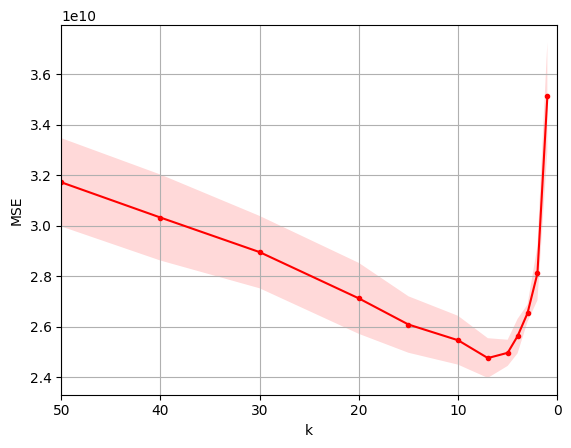

In [339]:
MSE_arr = -model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.plot(k_arr, MSE_arr, 'r.-')
plt.fill_between(k_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(k_arr), 0])
plt.grid()
plt.xlabel('k')
plt.ylabel('MSE')
pass

In [340]:
model.best_params_['fit__n_neighbors']

7

Выводы.
На основе исследований пришли к выводу , что линейная регрессия на данном датасете работает лучше , нежели метод k-ближайших соседей , тк точность на тесте у регрессии выше. На данном датасете получилось достигнуть 74% правильно угаданных цен на квартиры.